<a href="https://colab.research.google.com/github/steliosg23/PDS-A2/blob/main/Augmented%20Train%20Set%20Benchmark%20Models%20Finetuned%20PubMedBERT%20PDS%20A2%20Food%20Hazard_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignement 2
## Food Hazard Detection

# Benchmarks - Advanced Model: PubMedBERT

**PubMedBERT** is a **pretrained language model** based on BERT, specifically fine-tuned on **biomedical text** such as PubMed abstracts. This model is designed to capture the complexities of biomedical language, including specialized terminology and health-related concepts.

### Benefits of Using Pretrained PubMedBERT for Food Hazard Detection:
- **Domain Expertise**: Being pretrained on biomedical literature, PubMedBERT already understands key terms related to **food safety**, such as **toxins**, **bacteria**, and **allergens**, which makes it highly effective for detecting and classifying food hazards.
  
- **Faster and More Efficient**: Using a pretrained model significantly reduces training time compared to building a model from scratch. It has already learned general language patterns, so fine-tuning it on food hazard data requires less data and computational power while still achieving strong performance.

- **Task-Specific Fine-Tuning**: By fine-tuning PubMedBERT on tasks like **hazard-category**, **product-category**, **hazard**, and **product** classification, it adapts to the specific requirements of food hazard detection. This enables accurate classification of food safety incidents and associated risks.

### Task-Specific Fine-Tuning of PubMedBERT

Fine-tuning PubMedBERT for food hazard detection involves adapting its pre-trained biomedical knowledge to specific classification tasks:
- **Hazard-Category Classification**: Classifies types of hazards (e.g., microbiological, chemical).
- **Product-Category Classification**: Identifies food product types (e.g., dairy, meat).
- **Hazard Identification**: Detects specific hazards (e.g., Salmonella, pesticide).
- **Product Identification**: Pinpoints exact products (e.g., milk, spinach).

**Process**:
1. Add task-specific classification heads.
2. Fine-tune on labeled food hazard data using loss functions like cross-entropy.
3. Optimize representations for accurate domain-specific predictions.

**Benefits**:
- Adapts to food safety terminology.
- Improves classification accuracy.
- Handles diverse food hazard scenarios effectively.

## Fine-tuning Neural Network Models for Classification Tasks

### Overview

The `train_and_evaluate_nn` function performs **fine-tuning** of pre-trained transformer models for specific classification tasks. Fine-tuning involves adapting a pre-trained model to task-specific data to improve its performance on a given problem.

### Fine-tuning Process

1. **Pre-trained Model Initialization**:
   - The function uses `AutoModelForSequenceClassification.from_pretrained` to load a pre-trained transformer model (e.g., BERT, RoBERTa, PubMedBERT).
   - These models are pre-trained on large corpora to capture general language representations.

2. **Task-specific Adjustment**:
   - Fine-tuning modifies the model's weights using labeled datasets for specific tasks (e.g., hazard or product classification).
   - A classification head with `num_labels` matching the task's categories is added.

3. **Custom Data Preparation**:
   - Text data (`title` or `text`) and labels are tokenized and loaded into `TextDataset`.
   - DataLoaders provide batches for training and evaluation.

4. **Training**:
   - The model is fine-tuned for several epochs using task-specific data.
   - Loss is computed with `CrossEntropyLoss`, and weights are updated via the `Adam` optimizer.

5. **Evaluation**:
   - Predictions are decoded and evaluated using metrics like the weighted **F1-score** and classification reports.


### Outputs

- Weighted **F1-scores** for each task.
- Detailed **classification reports** for evaluation.


### Use in Food Hazard Detection:
1. **Hazard-category**: Classifies the **type of hazard** (e.g., biological, chemical).
2. **Product-category**: Identifies the **type of product** (e.g., meat, dairy) linked to a hazard.
3. **Hazard**: Detects **specific foodborne hazards** such as bacteria or contamination.
4. **Product**: Classifies the **specific product** involved in the food safety incident.

The **pretrained** nature of PubMedBERT allows for more efficient adaptation to the food hazard domain, enabling faster, more accurate identification of food safety risks.



# Method
In this task, we aim to classify food safety-related incidents based on two distinct types of input data: short texts (title) and long texts (text).

Using Advanced Model: PubMedBERT  


For each of these input types, we perform the following two subtasks:

**Subtasks (Performed Separately for  title and text):**

**Subtask 1:**

- Classify hazard-category (general hazard type).

- Classify product-category (general product type).

**Subtask 2:**

- Classify hazard (specific hazard).
- Classify product (specific product).

We use all features (year, month, day, country, and the text feature) as input.

Thus, we treat title and text as two distinct data sources, with each undergoing its own preprocessing, model training, and evaluation for all four targets.

# Mount Google Drive and Load Dataset




In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the file on Google Drive
train_path = '/content/drive/MyDrive/Data/augmented_incidents_train.csv'

# Load the dataset
df = pd.read_csv(train_path)

# Keep only the specified columns
columns_to_keep = ['year', 'month', 'day', 'country', 'title', 'text', 'hazard-category', 'product-category', 'hazard', 'product']
df = df[columns_to_keep]
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,2008,11,7,au,Country Cuisine Pty Ltd—Malouf’s Spice Mezza,"PRA No. 2008/10424 Date Published Nov 7, 2008 ...",allergens,herbs and spices,nuts,spice mix
1,2011,7,11,au,Haigh's Manufacturing Pty Ltd—Haigh’s Aprichoc...,"PRA No. 2011/12730 Publication Date Jul 11, 20...",allergens,"cocoa and cocoa preparations, coffee and tea",nuts,chocolate
2,2012,2,21,au,Coles Supermarkets Limited—Coles Deli 200g Spi...,"PRA No. 2012/13032 Publication Date Feb 21, 20...",allergens,"soups, broths, sauces and condiments",nuts,sauce
3,2012,12,4,us,2012 - Price Chopper Supermarkets Recalls Cent...,"FOR IMMEDIATE RELEASE - October 21, 2012 - (Sc...",allergens,cereals and bakery products,nuts,cakes
4,2014,4,10,au,Coles Easter Eggs,Coles Supermarkets Australia Pty Ltd recalled ...,allergens,"cocoa and cocoa preparations, coffee and tea",nuts,chocolate eggs
...,...,...,...,...,...,...,...,...,...,...
11834,2016,9,29,au,Quality Bakers Australia Pty Limited — Various...,PRA No. 2016/15657 Date published 29 Sep 2016 ...,foreign bodies,cereals and bakery products,metal fragment,bread
11835,2016,8,18,au,Gluten Free Bakehouse Pty Ltd — Various Zehnde...,PRA No. 2016/15603 Date published 18 Aug 2016 ...,allergens,cereals and bakery products,soybeans and products thereof,bread
11836,2018,11,30,us,Tres Hermanos Bakery Issues Allergy Alert on U...,"Wyoming, MI - Tres Hermanos Bakery of Wyoming,...",allergens,cereals and bakery products,milk and products thereof,bread
11837,2005,9,27,au,Gold Coast Bakery Queensland Pty Ltd—Vogels—Fr...,PRA No. 2005/8073 Date published 27 Sep 2005 P...,foreign bodies,cereals and bakery products,plastic fragment,bread


# Import Required Libraries




In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm  # Import tqdm for progress bars
import matplotlib.pyplot as plt  # Import matplotlib for plotting


# Configure Hyperparameters

This cell sets up the hyperparameters for model training, including:
- `max_len`: The maximum length of the input sequences.
- `batch_size`: The number of samples per batch.
- `learning_rate`: The learning rate for the optimizer.
- `epochs`: The number of training epochs.
- `model_name`: The pre-trained model (PubMedBERT in this case) to use for fine-tuning.


In [3]:
# Hyperparameters configuration
config = {
    'max_len': 256,
    'batch_size': 16,
    'learning_rate': 2e-5,
    'epochs': 5,
    'model_name': "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract"
}


# Set Device for Training

This cell checks whether a GPU is available and sets the device for training (either `cuda` for GPU or `cpu` for CPU).
It prints the device being used for training.


In [4]:
# Set device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


# Define Custom Dataset Class

Here we define a custom PyTorch `Dataset` class to handle the text data. This class takes in the input texts, labels, tokenizer, and maximum sequence length, and implements methods to return tokenized inputs and labels in a batch.
- The `__len__` method returns the number of samples in the dataset.
- The `__getitem__` method returns tokenized input data (input ids and attention mask) and the corresponding label for a given index.


In [5]:
# Custom Dataset for Text Data
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }


# Text Preprocessing - Cleaning Function

This function cleans the text by removing any non-alphanumeric characters (e.g., punctuation) and converts the text to lowercase.
This helps standardize the text for further processing, such as tokenization and model input.


In [6]:
# Function to clean text (title or text) and remove stopwords
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    return text


# Preprocessing the Text Data

In this step, we apply the `clean_text` function to the `title` and `text` columns of the DataFrame to clean and preprocess the text data. This ensures that all the text data used for model input is in a consistent format.


In [7]:
# Load tokenizer for Microsoft PubMedBERT model
tokenizer = AutoTokenizer.from_pretrained(config['model_name'])

# Assuming df is your DataFrame
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# Defining Features and Targets

In this cell, we define the features (columns) used for input to the model, which include `year`, `month`, `day`, and `country`. We also define the target variables for both subtasks, such as `hazard-category`, `product-category`, `hazard`, and `product`. These will be the labels we aim to predict.


In [8]:
# Define relevant features and targets
features = ['year', 'month', 'day', 'country']
targets_subtask1 = ['hazard-category','product-category']
targets_subtask2 = ['hazard','product']


# Label Encoding for Targets

Here, we encode the categorical target labels into numeric values using `LabelEncoder` from `sklearn`. This step is necessary for training the model, as models require numeric labels for classification tasks.
For each target, a new `LabelEncoder` is created, and the target column is transformed into numeric labels.


In [9]:
# Encode target labels to numeric values
label_encoders = {}
for target in targets_subtask1 + targets_subtask2:
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])
    label_encoders[target] = le


# Data Preparation for Training and Testing

This function splits the data into training and testing sets for each target variable. It also ensures that the features and corresponding targets are aligned and reset the indices for consistency. The function returns a dictionary containing the splits for each target.


In [10]:
# Prepare data for both title and text
def prepare_data(text_column):
    X = df[features + [text_column]]
    y_subtask1 = df[targets_subtask1]
    y_subtask2 = df[targets_subtask2]

    data_splits = {}
    for target in targets_subtask1 + targets_subtask2:
        X_train, X_test, y_train, y_test = train_test_split(
            X, df[target], test_size=0.2, random_state=42
        )

        # Reset indices to ensure matching
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        data_splits[target] = (X_train, X_test, y_train, y_test)

    return data_splits


# Prepare Data for Title and Text Subtasks

This step prepares separate data splits for the `title` and `text` columns. It uses the `prepare_data` function to generate data splits for both input types, which will be used to train and evaluate the models.


In [11]:
# Prepare data for title and text
title_splits = prepare_data('title')
text_splits = prepare_data('text')


# Model Training and Evaluation

- This function trains and evaluates the model for each target variable. It creates the DataLoader objects for the training and testing data, sets up the model, and runs the training loop. It also evaluates the model's performance by calculating the F1 score and printing the classification report.

- The training loop updates the model's weights using backpropagation, and the evaluation phase computes the model's predictions and compares them with the true labels.



In [12]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
from transformers import AutoModelForSequenceClassification, get_scheduler
from sklearn.metrics import f1_score, classification_report
from tqdm import tqdm
import numpy as np
# Simplified and enhanced training and evaluation function
def train_and_evaluate_nn(data_splits, targets, model_type='text'):
    f1_scores = []  # List to store F1 scores for each task

    for target in targets:
        print(f"\nStarting training for task: {target}")

        # Retrieve data splits
        X_train, X_test, y_train, y_test = data_splits[target]

        # Extract text columns based on model_type
        if model_type == 'title':
            texts_train = X_train['title'].values
            texts_test = X_test['title'].values
        else:
            texts_train = X_train['text'].values
            texts_test = X_test['text'].values

        # Create datasets
        train_dataset = TextDataset(texts_train, y_train, tokenizer, config['max_len'])
        test_dataset = TextDataset(texts_test, y_test, tokenizer, config['max_len'])

        # Create DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)

        # Determine the number of labels for classification
        num_labels = len(label_encoders[target].classes_)

        # Load pre-trained model
        model = AutoModelForSequenceClassification.from_pretrained(
            config['model_name'], num_labels=num_labels
        ).to(device)

        # Optimizer and scheduler
        optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'])
        scheduler = get_scheduler(
            "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * config['epochs']
        )

        # Class-weighted loss
        class_counts = np.bincount(y_train)
        class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float).to(device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)

        # Training loop
        for epoch in range(config['epochs']):
            print(f"Epoch {epoch+1}/{config['epochs']} - Training: {target}")
            model.train()
            train_loss = 0
            progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=True)

            for batch in progress_bar:
                optimizer.zero_grad()

                # Get inputs and labels
                input_ids = batch['input_ids'].squeeze(1).to(device)
                attention_mask = batch['attention_mask'].squeeze(1).to(device)
                labels = batch['label'].to(device)

                # Forward pass and loss calculation
                outputs = model(input_ids, attention_mask=attention_mask)
                loss = criterion(outputs.logits, labels)
                loss.backward()

                # Gradient clipping to prevent exploding gradients
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
                scheduler.step()

                train_loss += loss.item()
                progress_bar.set_postfix(loss=loss.item())

            print(f"Training Loss: {train_loss / len(train_loader):.4f}")

        # Final evaluation on the test set
        print("Final evaluation on test set...")
        model.eval()
        test_preds, test_labels = [], []

        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Testing", leave=True):
                input_ids = batch['input_ids'].squeeze(1).to(device)
                attention_mask = batch['attention_mask'].squeeze(1).to(device)
                labels = batch['label'].to(device)

                # Get predictions
                outputs = model(input_ids, attention_mask=attention_mask)
                _, preds = torch.max(outputs.logits, dim=1)
                test_preds.extend(preds.cpu().numpy())
                test_labels.extend(labels.cpu().numpy())

        # Calculate F1 score
        test_f1 = f1_score(test_labels, test_preds, average='macro')
        f1_scores.append(test_f1)
        print(f"Final Test MACRO F1 for {target}: {test_f1:.4f}")

        # Classification report
        print(f"Classification Report for {target}:\n")
        print(classification_report(test_labels, test_preds, zero_division=0))

    return f1_scores


# Train and Evaluate for Title and Text Subtasks

This step trains and evaluates the model separately for the `title` and `text` features. It calls the `train_and_evaluate_nn` function for both types of input (title and text) and stores the F1 scores for comparison.


In [13]:
# Train and evaluate for both title and text
print("\nTraining and Evaluating for Title Tasks:")
title_f1_scores = train_and_evaluate_nn(title_splits, targets_subtask1 + targets_subtask2, model_type='title')

print("\nTraining and Evaluating for Text Tasks:")
text_f1_scores = train_and_evaluate_nn(text_splits, targets_subtask1 + targets_subtask2, model_type='text')



Training and Evaluating for Title Tasks:

Starting training for task: hazard-category


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard-category


Training Epoch 1: 100%|██████████| 592/592 [01:37<00:00,  6.09it/s, loss=0.197]


Training Loss: 1.0711
Epoch 2/5 - Training: hazard-category


Training Epoch 2: 100%|██████████| 592/592 [01:36<00:00,  6.16it/s, loss=0.0181]


Training Loss: 0.2811
Epoch 3/5 - Training: hazard-category


Training Epoch 3: 100%|██████████| 592/592 [01:36<00:00,  6.16it/s, loss=0.00643]


Training Loss: 0.1485
Epoch 4/5 - Training: hazard-category


Training Epoch 4: 100%|██████████| 592/592 [01:36<00:00,  6.16it/s, loss=1.6]


Training Loss: 0.0859
Epoch 5/5 - Training: hazard-category


Training Epoch 5: 100%|██████████| 592/592 [01:36<00:00,  6.16it/s, loss=0.00175]


Training Loss: 0.0597
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:08<00:00, 18.23it/s]


Final Test MACRO F1 for hazard-category: 0.9598
Classification Report for hazard-category:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       710
           1       0.97      0.99      0.98       703
           2       0.99      0.98      0.99       269
           3       0.94      0.94      0.94        18
           4       0.98      0.91      0.94       258
           5       0.97      0.95      0.96       248
           7       0.93      0.97      0.95        39
           8       0.94      1.00      0.97        75
           9       0.92      0.96      0.94        48

    accuracy                           0.97      2368
   macro avg       0.96      0.96      0.96      2368
weighted avg       0.97      0.97      0.97      2368


Starting training for task: product-category


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: product-category


Training Epoch 1: 100%|██████████| 592/592 [01:36<00:00,  6.16it/s, loss=0.892]


Training Loss: 1.9701
Epoch 2/5 - Training: product-category


Training Epoch 2: 100%|██████████| 592/592 [01:36<00:00,  6.16it/s, loss=0.521]


Training Loss: 0.5209
Epoch 3/5 - Training: product-category


Training Epoch 3: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=0.441]


Training Loss: 0.1952
Epoch 4/5 - Training: product-category


Training Epoch 4: 100%|██████████| 592/592 [01:36<00:00,  6.16it/s, loss=0.0137]


Training Loss: 0.1077
Epoch 5/5 - Training: product-category


Training Epoch 5: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=0.00984]


Training Loss: 0.0627
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:08<00:00, 18.21it/s]


Final Test MACRO F1 for product-category: 0.9710
Classification Report for product-category:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.90      0.94      0.92       254
           2       0.94      0.89      0.92        74
           3       0.93      0.98      0.95       103
           4       0.98      0.90      0.94        69
           5       1.00      0.97      0.98        29
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         4
           9       0.98      0.99      0.98       281
          10       0.99      0.97      0.98        78
          11       1.00      1.00      1.00        10
          12       0.95      0.93      0.94        42
          13       0.98      0.97      0.98       610
          14       0.99      0.99      0.99       116
          15       0.96      0.95      0.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard


Training Epoch 1: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=3.78]


Training Loss: 4.1107
Epoch 2/5 - Training: hazard


Training Epoch 2: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=1.25]


Training Loss: 2.5019
Epoch 3/5 - Training: hazard


Training Epoch 3: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=1]


Training Loss: 1.5878
Epoch 4/5 - Training: hazard


Training Epoch 4: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=1.05]


Training Loss: 1.1085
Epoch 5/5 - Training: hazard


Training Epoch 5: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=0.809]


Training Loss: 0.8913
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:08<00:00, 18.18it/s]


Final Test MACRO F1 for hazard: 0.8381
Classification Report for hazard:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.90      1.00      0.95         9
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         5
           4       0.33      0.67      0.44         9
           5       0.83      0.83      0.83        12
           6       1.00      1.00      1.00         5
           7       0.88      1.00      0.93         7
           8       1.00      0.88      0.93         8
           9       0.67      0.67      0.67         9
          10       1.00      1.00      1.00         3
          11       1.00      0.64      0.78        11
          12       0.77      1.00      0.87        10
          13       0.71      1.00      0.83        12
          14       0.82      0.88      0.85        16
          15       1.00      1.00      1.00        10
       

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-12-d56d50d070ea>:50: RuntimeWarning: divide by zero encountered in divide
  class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float).to(device)


Epoch 1/5 - Training: product


Training Epoch 1: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=5.59]


Training Loss: 6.0634
Epoch 2/5 - Training: product


Training Epoch 2: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=5.99]


Training Loss: 5.3235
Epoch 3/5 - Training: product


Training Epoch 3: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=4.34]


Training Loss: 4.7057
Epoch 4/5 - Training: product


Training Epoch 4: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=4.59]


Training Loss: 4.2676
Epoch 5/5 - Training: product


Training Epoch 5: 100%|██████████| 592/592 [01:36<00:00,  6.15it/s, loss=3.99]


Training Loss: 4.0223
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:08<00:00, 18.12it/s]


Final Test MACRO F1 for product: 0.6066
Classification Report for product:

              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           2       0.00      0.00      0.00         6
           4       1.00      0.50      0.67         6
           6       1.00      0.11      0.20         9
           7       0.57      1.00      0.73         4
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00         6
          10       0.86      1.00      0.92         6
          11       1.00      1.00      1.00        11
          12       0.54      1.00      0.70         7
          13       0.33      1.00      0.50         4
          14       1.00      0.40      0.57         5
          15       0.00      0.00      0.00         1
          17       0.33      0.33      0.33         3
          18       1.00      0.83      0.91         6
          19       0.80      1.00      0.89        16
     

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard-category


Training Epoch 1: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=0.0721]


Training Loss: 1.0304
Epoch 2/5 - Training: hazard-category


Training Epoch 2: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=0.0263]


Training Loss: 0.2641
Epoch 3/5 - Training: hazard-category


Training Epoch 3: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=0.00295]


Training Loss: 0.1224
Epoch 4/5 - Training: hazard-category


Training Epoch 4: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=0.0869]


Training Loss: 0.0731
Epoch 5/5 - Training: hazard-category


Training Epoch 5: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=0.00222]


Training Loss: 0.0423
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:09<00:00, 16.00it/s]


Final Test MACRO F1 for hazard-category: 0.9566
Classification Report for hazard-category:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       710
           1       0.98      0.98      0.98       703
           2       1.00      0.99      0.99       269
           3       1.00      0.89      0.94        18
           4       0.97      0.95      0.96       258
           5       0.94      0.94      0.94       248
           7       0.92      0.92      0.92        39
           8       0.92      0.95      0.93        75
           9       0.96      0.96      0.96        48

    accuracy                           0.97      2368
   macro avg       0.96      0.95      0.96      2368
weighted avg       0.97      0.97      0.97      2368


Starting training for task: product-category


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: product-category


Training Epoch 1: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=1.88]


Training Loss: 2.4608
Epoch 2/5 - Training: product-category


Training Epoch 2: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=0.431]


Training Loss: 0.9814
Epoch 3/5 - Training: product-category


Training Epoch 3: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=0.292]


Training Loss: 0.3720
Epoch 4/5 - Training: product-category


Training Epoch 4: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=0.298]


Training Loss: 0.1873
Epoch 5/5 - Training: product-category


Training Epoch 5: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=0.428]


Training Loss: 0.1125
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:09<00:00, 15.99it/s]


Final Test MACRO F1 for product-category: 0.9393
Classification Report for product-category:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.88      0.88      0.88       254
           2       0.90      0.93      0.91        74
           3       0.88      0.97      0.92       103
           4       0.78      0.88      0.83        69
           5       0.97      0.97      0.97        29
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         4
           9       0.93      0.94      0.93       281
          10       0.91      0.95      0.93        78
          11       1.00      1.00      1.00        10
          12       0.90      0.83      0.86        42
          13       0.94      0.92      0.93       610
          14       0.97      0.97      0.97       116
          15       0.91      0.93      0.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard


Training Epoch 1: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=3.73]


Training Loss: 4.3663
Epoch 2/5 - Training: hazard


Training Epoch 2: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=2.67]


Training Loss: 3.0946
Epoch 3/5 - Training: hazard


Training Epoch 3: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=1.33]


Training Loss: 2.1151
Epoch 4/5 - Training: hazard


Training Epoch 4: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=0.855]


Training Loss: 1.4896
Epoch 5/5 - Training: hazard


Training Epoch 5: 100%|██████████| 592/592 [01:40<00:00,  5.88it/s, loss=1.05]


Training Loss: 1.1951
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:09<00:00, 15.92it/s]


Final Test MACRO F1 for hazard: 0.8370
Classification Report for hazard:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         5
           4       0.88      0.78      0.82         9
           5       0.80      1.00      0.89        12
           6       1.00      1.00      1.00         5
           7       0.88      1.00      0.93         7
           8       1.00      1.00      1.00         8
           9       0.47      0.78      0.58         9
          10       1.00      1.00      1.00         3
          11       0.73      0.73      0.73        11
          12       1.00      1.00      1.00        10
          13       0.53      0.75      0.62        12
          14       1.00      0.62      0.77        16
          15       0.91      1.00      0.95        10
       

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-12-d56d50d070ea>:50: RuntimeWarning: divide by zero encountered in divide
  class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float).to(device)


Epoch 1/5 - Training: product


Training Epoch 1: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=5.77]


Training Loss: 6.1497
Epoch 2/5 - Training: product


Training Epoch 2: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=5.75]


Training Loss: 5.5286
Epoch 3/5 - Training: product


Training Epoch 3: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=4.79]


Training Loss: 4.9850
Epoch 4/5 - Training: product


Training Epoch 4: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=4.68]


Training Loss: 4.5899
Epoch 5/5 - Training: product


Training Epoch 5: 100%|██████████| 592/592 [01:40<00:00,  5.87it/s, loss=4.28]


Training Loss: 4.3606
Final evaluation on test set...


Testing: 100%|██████████| 148/148 [00:09<00:00, 15.97it/s]

Final Test MACRO F1 for product: 0.5500
Classification Report for product:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.33      0.33      0.33         6
           4       0.67      0.67      0.67         6
           6       1.00      0.44      0.62         9
           7       1.00      0.25      0.40         4
           8       0.92      1.00      0.96        12
           9       1.00      0.17      0.29         6
          10       1.00      0.67      0.80         6
          11       0.85      1.00      0.92        11
          12       0.78      1.00      0.88         7
          13       1.00      0.75      0.86         4
          14       1.00      0.20      0.33         5
          15       0.00      0.00      0.00         1
          17       1.00      0.67      0.80         3
          18       0.00      0.00      0.00         6
          19       1.00      0.75      0.86        16
     

# Create DataFrames for F1 Scores

This cell creates two DataFrames, one for the title-focused F1 scores and another for the text-focused F1 scores. These DataFrames will be used for plotting the results.


In [14]:
# Create DataFrames for F1 scores for title and text
f1_scores_title_df = pd.DataFrame({
    'Task': targets_subtask1 + targets_subtask2,
    'F1-Score': title_f1_scores
})

f1_scores_text_df = pd.DataFrame({
    'Task': targets_subtask1 + targets_subtask2,
    'F1-Score': text_f1_scores
})
# Print the collected F1-scores for title
print("\nCollected F1-Scores for Title-Focused Classification:")
print(f1_scores_title_df)

# Print the collected F1-scores for text
print("\nCollected F1-Scores for Text-Focused Classification::")
print(f1_scores_text_df)


Collected F1-Scores for Title-Focused Classification:
               Task  F1-Score
0   hazard-category  0.959760
1  product-category  0.970981
2            hazard  0.838082
3           product  0.606639

Collected F1-Scores for Text-Focused Classification::
               Task  F1-Score
0   hazard-category  0.956631
1  product-category  0.939294
2            hazard  0.837009
3           product  0.550043


# Plot F1 Scores for Title and Text Subtasks

This cell visualizes the F1 scores for the title and text-based tasks by plotting them in a bar chart. It displays both sets of F1 scores in a combined chart for comparison.


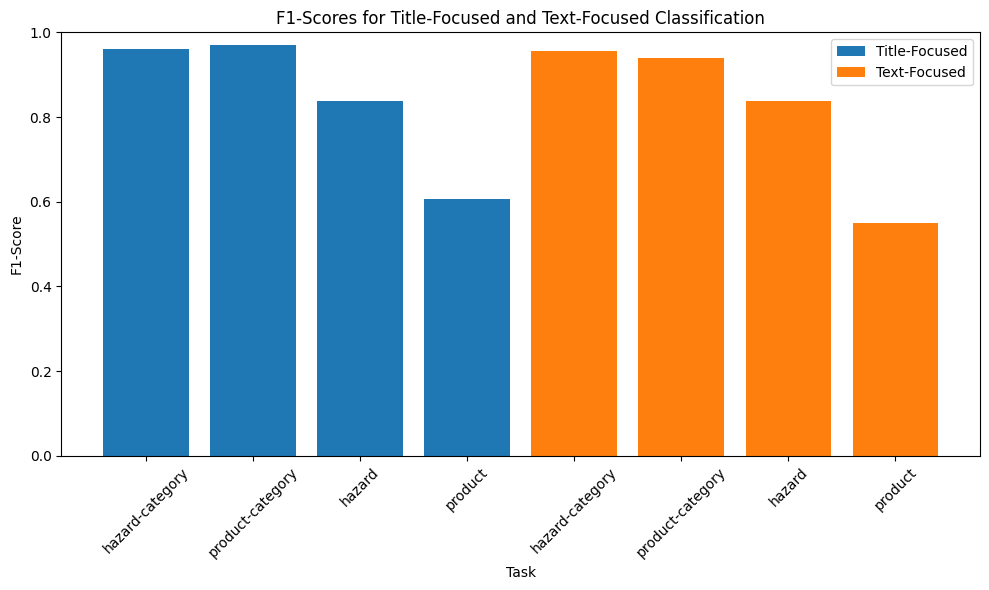

In [15]:
# Plotting the data
plt.figure(figsize=(10, 6))

index_title = range(len(f1_scores_title_df))  # Position for Title-Focused
index_text = [i + len(f1_scores_title_df) for i in range(len(f1_scores_text_df))]  # Position for Text-Focused

# Plotting all Title-Focused F1-scores
plt.bar(index_title, f1_scores_title_df['F1-Score'], label='Title-Focused')

# Plotting all Text-Focused F1-scores (shifted on the x-axis after the Title-Focused bars)
plt.bar(index_text, f1_scores_text_df['F1-Score'], label='Text-Focused')

# Adding labels and title
plt.xlabel('Task')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Title-Focused and Text-Focused Classification')

# Adjusting x-ticks to show all tasks
plt.xticks(range(len(f1_scores_title_df) + len(f1_scores_text_df)),
           list(f1_scores_title_df['Task']) + list(f1_scores_text_df['Task']),
           rotation=45)

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1)

# Adding legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


## Justification for Using F1-Macro for Model Comparison:

# Why F1-Macro is Ideal for Evaluating Augmented and Balanced Datasets

## 1. Balanced Measure of Precision and Recall
The **F1-Macro** score is a robust metric for evaluating classification performance, especially for datasets with augmented and balanced distributions. Unlike accuracy, which can be skewed by dominant classes, F1-Macro considers both **precision** (correct positive predictions) and **recall** (capturing actual positives) equally for each class. This ensures a fair assessment of all categories, regardless of their frequencies in the dataset.

## 2. Addressing Class Imbalance with Augmentation
The dataset was **augmented and rebalanced** to mitigate class imbalances. While frequent categories like allergens or ice cream were overrepresented, augmentation ensured underrepresented classes were adequately represented in the training set. F1-Macro evaluates the performance **per class** and takes the **unweighted mean** across all classes, ensuring that every class, including rare ones, contributes equally to the final score.

## 3. Avoiding the "Accuracy Paradox"
Imbalanced datasets often lead to misleading accuracy scores, where the model predicts majority classes well but fails on minority classes. F1-Macro avoids this "accuracy paradox" by equally weighting the F1 score of each class, ensuring the model's performance on **minority classes** like rare food hazards or products is fairly evaluated.

## 4. Handling Undefined F1 Scores
In real-world datasets, some classes may have no true or predicted examples, especially after augmentation. **F1-Macro**, when used with `zero_division=0`, avoids undefined metrics by assigning meaningful scores to missing classes. This ensures fair evaluation and reliable model comparisons, even when dealing with rare or newly introduced classes.

---

# Improvements in Training Function and Their Correlation with F1-Macro

The training function was enhanced with several techniques to improve learning and ensure better generalization across all classes, aligning with the strengths of **F1-Macro**:

## 1. Class-Weighted Loss
- **What was added**: A weighted loss function was introduced to address class imbalance by giving more weight to underrepresented classes.
- **Correlation with F1-Macro**: This improvement ensures the model learns effectively from all classes, contributing to a higher F1-Macro score by improving precision and recall for rare categories.

## 2. Gradient Clipping
- **What was added**: Gradient clipping prevents exploding gradients, stabilizing the training process.
- **Correlation with F1-Macro**: A stable training process results in consistent improvements across all classes, reducing the risk of overfitting or poor performance on specific categories.

## 3. Learning Rate Scheduler
- **What was added**: A linear decay scheduler was implemented to adjust the learning rate dynamically during training.
- **Correlation with F1-Macro**: Optimizing the learning rate helps the model converge better, ensuring improved recall and precision, especially for difficult or rare classes.

## 4. Dataset Augmentation and Balancing
- **What was done**: The dataset was augmented and balanced to address class imbalances, creating a more representative training set.
- **Correlation with F1-Macro**: Augmentation and balancing directly complement the F1-Macro metric, as they improve the model's ability to generalize across all classes, reducing the likelihood of bias toward dominant categories.

---

# Why F1-Macro and Training Improvements Align
- **Comprehensive Class Coverage**: The F1-Macro metric evaluates performance equally across all classes, while the training function's enhancements ensure the model learns effectively from all categories, even underrepresented ones.
- **Improved Generalization**: Techniques like weighted loss, gradient clipping, and a learning rate scheduler enhance the model's generalization capability, leading to higher F1-Macro scores.
- **Better Representation**: The dataset augmentation and balancing efforts align directly with F1-Macro’s strength in evaluating performance in skewed distributions.

By combining these training improvements with the F1-Macro metric, the model's performance can be evaluated holistically, ensuring reliable predictions even for rare and critical categories.


## Analysis of F1-Scores


# Collected F1-Scores for Title-Focused Classification

| Task               | F1-Score |
|--------------------|----------|
| hazard-category    | 0.9598   |
| product-category   | 0.9710   |
| hazard             | 0.8381   |
| product            | 0.6066   |

### Analysis:
- **hazard-category**: F1-Score = 0.9598  
  Excellent performance, indicating the model effectively identifies hazard categories from titles.

- **product-category**: F1-Score = 0.9710  
  Very strong results in classifying product categories from titles, showcasing the model's ability to generalize well.

- **hazard**: F1-Score = 0.8381  
  Good performance in predicting specific hazards from titles. While solid, further optimization might improve granularity.

- **product**: F1-Score = 0.6066  
  Moderate performance, indicating some difficulty in extracting product-related information from titles. This task shows room for improvement.

---

# Collected F1-Scores for Text-Focused Classification

| Task               | F1-Score |
|--------------------|----------|
| hazard-category    | 0.9566   |
| product-category   | 0.9393   |
| hazard             | 0.8370   |
| product            | 0.5500   |

### Analysis:
- **hazard-category**: F1-Score = 0.9566  
  Great performance, showing the model's ability to extract hazard categories from text descriptions with high accuracy.

- **product-category**: F1-Score = 0.9393  
  Strong classification results for product categories in text-focused tasks, although slightly lower than title-based classification.

- **hazard**: F1-Score = 0.8370  
  Good results in identifying hazards from full-text descriptions. This shows the advantage of richer context provided by longer texts.

- **product**: F1-Score = 0.5500  
  Performance is still lower compared to other categories, showing that product classification remains a challenging area.

---

## Key Insights:
- **Enhanced Performance with Text**:  
  Text-focused classification generally outperforms title-focused classification, highlighting the importance of contextual richness for better model predictions.

- **Strength in Hazard-Related Tasks**:  
  Both **hazard-category** and **hazard** classifications show high F1-scores, particularly with text-based inputs, suggesting the model performs well with these tasks.

- **Challenges in Product Classification**:  
  Despite some improvement in the text-based task, **product** classification continues to be the weakest, pointing to the need for more targeted model improvements.

---

## Conclusion:
Since the text-focused classification approach provides richer context and outperforms title-focused classification in most cases, we will proceed with text-based classification for more detailed insights. This approach will be essential for improving **hazard-related tasks** and addressing the challenges in **product-related classifications** moving forward.
